***
# <font color=green size=6>PROJETO DADOS DE PERFORMACE DOS ESTUDANTES</font>
***

# <font color=green>1-Considerações iniciais</font>
***

### Dados sobre a performace de estudantes em exames

Deseja visualizar os dados usados nesse projeto? 

Você pode encontrar nesse site: http://roycekimmons.com/tools/generated_data/exams

Ou se preferir pode utilizar esse link para obter os dados pelo Kaggle: https://www.kaggle.com/spscientist/students-performance-in-exams


Esse projeto foi feito exclusivamente para aprimorar meus conhecimentos sobre data science. 

# <font color=green>1-Importando os dados e bibliotecas</font>
***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pygal
%matplotlib inline


dados = pd.read_csv("dados/StudentsPerformance.csv")

dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


***Aqui temos uma visualização inicial dos dados. Começaremos tratando eles.***

# <font color=green>2-Fazendo o tratamento dos dados</font>
***

In [2]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Podemos perceber que não temos nenhum dado faltando.**

# <font color=green>3-Analisando as pessoas que fazem parte dos nossos dados</font>
***

## <font color=green>3.1 Quantas pessoas são homens e quantas são mulheres? </font>
***

In [3]:
generos_total = dados["gender"].value_counts()
generos = generos_total.to_frame()
generos.columns = ["frequency"]
generos.rename_axis('Gender', axis='columns', inplace=True)
generos

Gender,frequency
female,518
male,482


***Podemos ver que está bem dividida os números de homens e mulheres***

Para melhorar a apresentação, coloquei os dados em um gráfico:

([<matplotlib.patches.Wedge at 0x2b90f969a60>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'female'),
  Text(0.06782226650507357, -1.1980818587083752, 'male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.8%'),
  Text(0.03956298879462625, -0.698881084246552, '48.2%')])

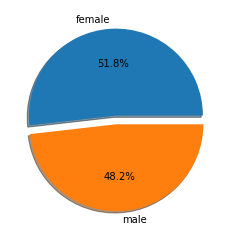

In [4]:
explode = (0, 0.1)

grafico_pizza = plt.pie(generos['frequency'],explode = explode, labels=generos.index, autopct='%1.1f%%', shadow=True)
grafico_pizza

## <font color=green>3.2 Como as pesssoas estão divididas nos grupos étinicos? </font>
***

In [5]:
total_etinias = dados["race/ethnicity"].value_counts()
etinias = total_etinias.to_frame()
etinias.sort_index(ascending=True, inplace=True)
tabela_genero_por_etinias = pd.crosstab(dados['gender'],
                                        dados['race/ethnicity'])


In [6]:
etinias

,race/ethnicity
group A,89
group B,190
group C,319
group D,262
group E,140


***Realizando o mesmo procedimento que o tópico anterior chegamos nesse resultado. Mas agora colocaremos os dados em um gráfico de colunas***

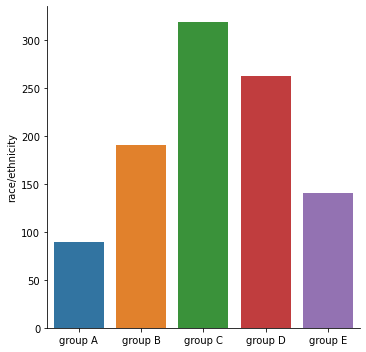

In [7]:
sns.catplot(y='race/ethnicity',
            x=etinias.index, 
            data=etinias, 
            kind='bar',)

***Agora vamos analisar quantas pessoas dentro desse grupo são homens e quantas são mulheres***

In [8]:
tabela_genero_por_etinias

race/ethnicity,group A,group B,group C,group D,group E
gender,,,,,
female,36,104,180,129,69
male,53,86,139,133,71


## <font color=green>3.3 Quantas pessoas tem pais com educação com ensino superior ou acima?</font>
***

In [9]:
pais_com_ensino_superior = dados.query("`parental level of education` != 'high school' & `parental level of education` != 'some high school'")
pais_sem_ensino_superior = dados.query("`parental level of education` == 'high school' | `parental level of education` == 'some high school'")
print(f'A quantidade de pais com ensino superior ou acima é {pais_com_ensino_superior.shape[0]}')
print(f'A quantidade de pais sem ensino superior é {pais_sem_ensino_superior.shape[0]}')

A quantidade de pais com ensino superior ou acima é 625
A quantidade de pais sem ensino superior é 375


# <font color=green>4-Analisando as notas dos alunos</font>
***

## <font color=green>4.1 Qual a média geral dos alunos? E a média em cada matéria? </font>
***

In [10]:
dados['mean'] = round((dados['math score'] + 
                       dados['reading score'] +
                       dados['writing score'])/3, 2)

dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


***Decidi adicionar uma nova coluna de médias***

In [11]:
media_geral = dados['mean'].mean()
media_matematica = dados['math score'].mean()
media_leitura = dados['reading score'].mean()
media_escrita = dados['writing score'].mean()


In [12]:
data = [round(media_matematica, 2), round(media_leitura, 2), round(media_escrita, 2), round(media_geral, 2)]
medias_dados = pd.DataFrame(data, 'Math Reading Writing total'.split(), 'Mean'.split())
medias_dados

,Mean
Math,66.09
Reading,69.17
Writing,68.05
total,67.77


***Vemos que a nota de matemática é menor que as notas de outras matérias. Vamos vizualizar em um gráfico para ver como essas notas estão distribuidas***

<AxesSubplot:ylabel='Density'>

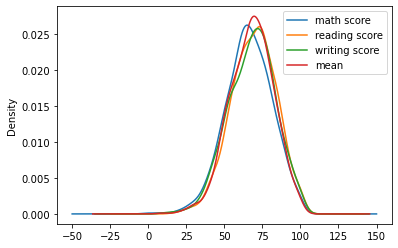

In [13]:
dados.plot(kind = "kde")

***Nesses dois gráficos podemos ver como está distribuido as notas. Vamos ver se os alunos com maiores notas em uma matéria também tem notas maiores nas outras matérias***

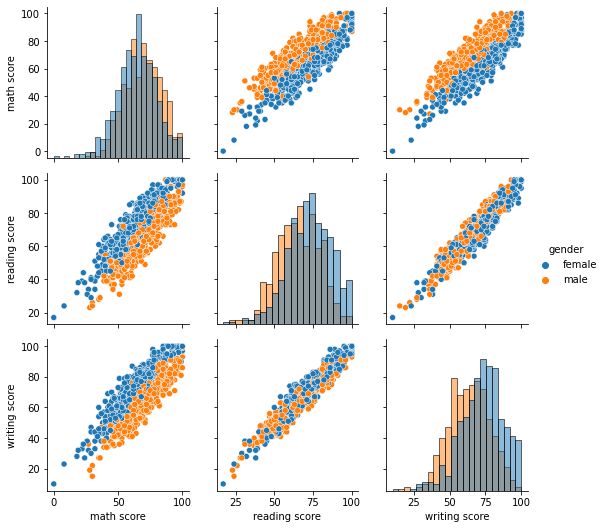

In [14]:
notas = dados.drop('mean',1)
g = sns.PairGrid(notas, hue ='gender')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend(title="gender", adjust_subtitles=True)

***Vemos nesses gráficos que alunos que tiram nota maior em uma matéria tendem a tirar nota maior em outras matérias também. Aproveitei e já diferenciei os alunos pelo sexo, podemos ver que os homens vão melhor em matemática e as mulheres melhores em escrita e leitura.***

## <font color=green>4.2 Existe diferença entre as notas dos alunos com pais com ensino superior? As notas aumentam conforme aumenta o ensino dos pais? </font>
***

In [15]:
pais_com_ensino_superior.describe()

,math score,reading score,writing score
count,625.000000,625.000000,625.000000
mean,68.070400,71.208000,70.718400
std,14.795123,14.094516,14.737035
min,19.000000,23.000000,19.000000
25%,58.000000,61.000000,61.000000
50%,68.000000,72.000000,72.000000
75%,79.000000,81.000000,81.000000
max,100.000000,100.000000,100.000000


In [16]:
pais_sem_ensino_superior.describe()

,math score,reading score,writing score
count,375.000000,375.000000,375.000000
mean,62.786667,65.770667,63.613333
std,15.212833,14.812760,14.926284
min,0.000000,17.000000,10.000000
25%,53.000000,55.000000,53.000000
50%,64.000000,67.000000,65.000000
75%,73.000000,76.000000,75.000000
max,99.000000,100.000000,100.000000


<AxesSubplot:>

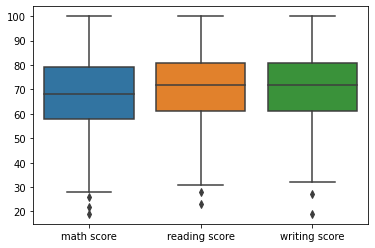

In [42]:
sns.boxplot(data=pais_com_ensino_superior)

<AxesSubplot:>

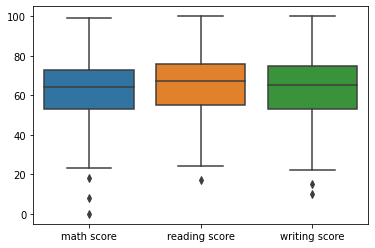

In [18]:
sns.boxplot(data=pais_sem_ensino_superior)

***Olhando essas duas tabelas e os gráficos podemos ver uma diferença entre as notas dos filhos que tem pais com ensino superior com os que não tem.
Mas vamos dar uma olhada de maneira mais aprofundada alguns pontos, colocando de uma maneira mais clara.***

In [19]:
nivel_educacional_dos_pais = dados.groupby('parental level of education').mean().round(2)
ordem = ["master's degree", "bachelor's degree", 'some college', "associate's degree", 'high school', 'some high school']
nivel_educacional_dos_pais = nivel_educacional_dos_pais.reindex(ordem)
nivel_educacional_dos_pais

,math score,reading score,writing score,mean
parental level of education,,,,
master's degree,69.75,75.37,75.68,73.60
bachelor's degree,69.39,73.00,73.38,71.92
some college,67.13,69.46,68.84,68.48
associate's degree,67.88,70.93,69.90,69.57
high school,62.14,64.70,62.45,63.10
some high school,63.50,66.94,64.89,65.11


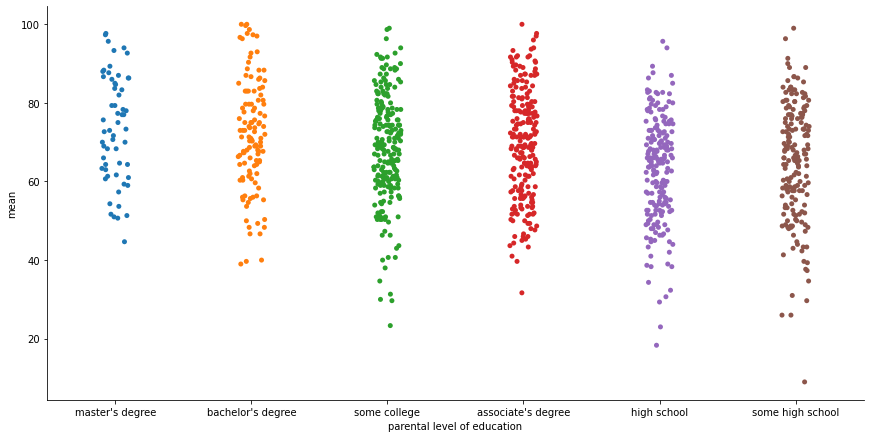

In [20]:
grafico_educacao_dos_pais_nota = sns.catplot(x='parental level of education', y='mean', data=dados, height=6, aspect=2, order= ordem)


***Podemos ver aqui, as notas dos alunos aumenta conforme aumeta o nível educacional dos pais.*** 

## <font color=green>4.3 O almoço dos alunos tem alguma relação com suas notas nas materias de escrita e leitura?</font>
***

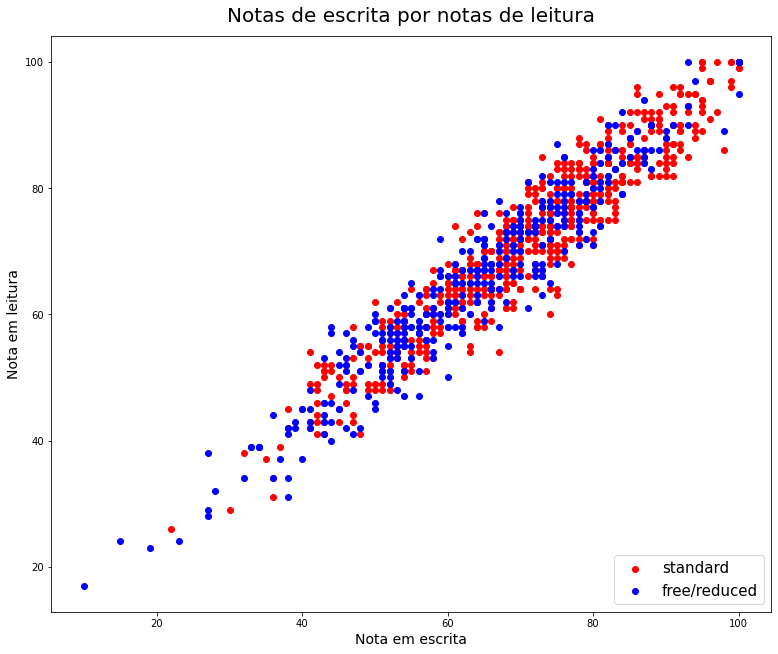

In [21]:
fig1 = plt.figure(figsize=(10,8))
eixo1 = fig1.add_axes([0, 0, 1, 1])

cores = {'standard': 'r','free/reduced': 'b'}

for almoco in dados['lunch'].unique():
    tmp = dados[dados['lunch'] == almoco]
    eixo1.scatter(tmp['writing score'], tmp['reading score'],
                 color=cores[almoco])

eixo1.set_title('Notas de escrita por notas de leitura', fontsize=20, pad=14)
eixo1.set_xlabel('Nota em escrita', fontsize=14)
eixo1.set_ylabel('Nota em leitura', fontsize=14)
eixo1.legend(cores, fontsize=15, loc= 'lower right')

## <font color=green>4.4 Os alunos de alguma etinia tem médias maiores?</font>
***

In [22]:
medias_por_etinias = dados.groupby('race/ethnicity', axis=0).mean().round(2)
medias_por_etinias.drop(['math score', 'reading score', 'writing score'], axis=1, inplace=True)
medias_por_etinias

,mean
race/ethnicity,
group A,62.99
group B,65.47
group C,67.13
group D,69.18
group E,72.75


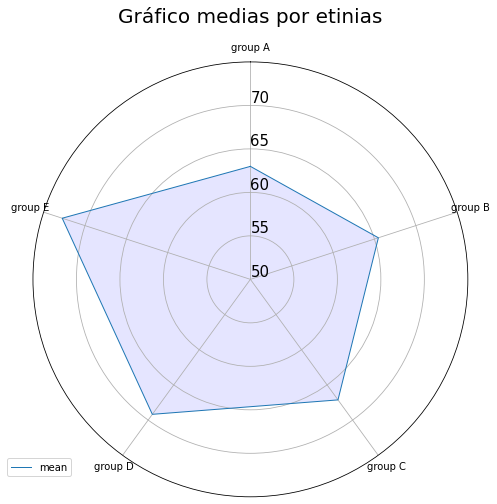

In [46]:
from math import pi

categories=list(medias_por_etinias.index)
N = len(categories)
angulos = [n / float(N) * 2 * pi for n in range(N)]
angulos += angulos[:1]

fig = plt.figure(figsize=(10,8))
eixo = fig.add_axes([0, 0, 1, 1])

eixo = plt.subplot(111, polar=True)
eixo.set_theta_offset(pi / 2)
eixo.set_theta_direction(-1)
plt.xticks(angulos[:-1], categories)
eixo.set_rlabel_position(0)
listras = []
listras_str = []
for i in range (15):
    listras.append(i*5)
    listras_str.append(str(i*5))
plt.yticks(listras, listras_str, color="k", size=15)
plt.ylim(50,75)

valores = []
for i in range(5):
    valor = medias_por_etinias.iloc[i].values.flatten().tolist()
    if i == 0:
        valores.append(valor[0])
        valores.append(valor[0])
    else:
        valores.insert(-1, valor[0])
eixo.plot(angulos, valores, linewidth=1, linestyle='solid', label="mean")
eixo.fill(angulos, valores, 'b', alpha=0.1)

 
eixo.set_title('Gráfico medias por etinias', fontsize=20, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

## <font color=green>4.5 Os alunos que fizeram curso preparatório tem notas maiores?</font>
***

Text(0, 0.5, 'Média')

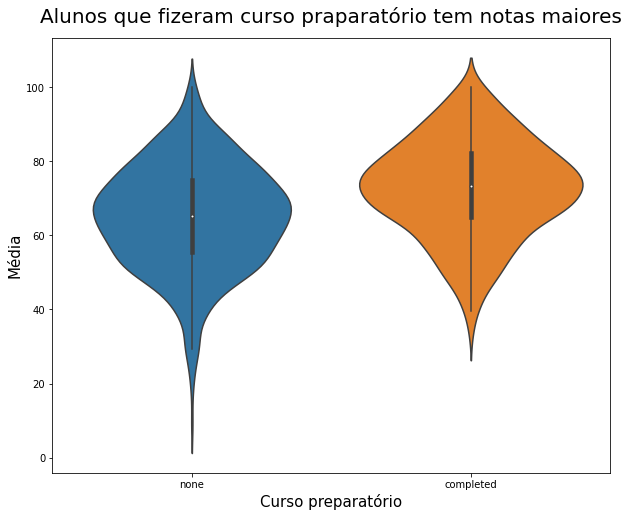

In [62]:
fig = plt.figure(figsize=(10,8))

ax = sns.violinplot(x=dados['test preparation course'], y=dados['mean'], data=dados)
ax.set_title('Alunos que fizeram curso praparatório tem notas maiores', fontsize = 20, pad=15)
ax.set_xlabel('Curso preparatório', fontsize=15)
ax.set_ylabel('Média', fontsize=15)